# Installing and Importing all required libraries and functions

In [1]:
!pip install tensorflow-addons

In [2]:
!pip install tensorflow
!pip install numpy
!pip install matplotlib
!pip install scikit-learn
!pip install opencv-python
!pip install scikit-learn
!pip install opencv-python-headless
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from keras import backend as K
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data_dir = '/Users/nikhil/Downloads/ML_Ass2_Dataset/train'
val_data_dir = '/Users/nikhil/Downloads/ML_Ass2_Dataset/validation'
test_data_dir = '/Users/nikhil/Downloads/ML_Ass2_Dataset/test'

train_data_dir, val_data_dir and test_data_dir contains the data we work on 
Now as i am working in jupyter the dataset is in my local computer at the mentioned address.
If we want to work from online itself we can use commands :
First we need to connect to drive so : 
#Since the assignments datasets is in the google drive lets import and mount the drive in the google collab itself.To run this part you may have to mount dats

from google.colab import drive

drive.mount('/content/drive')

Next we need to unzip and store it in a folder for that we use : 

#Unzip the contents into the colab files again it depends on how you are uploading the data

!unzip '/content/drive/MyDrive/CS550-Asg2/train.zip' -d '/content/train/'

!unzip '/content/drive/MyDrive/CS550-Asg2/test.zip' -d '/content/test/'

!unzip '/content/drive/MyDrive/CS550-Asg2/validation.zip' -d '/content/validation/'

In [4]:
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

F1 Score is one of the important metrics we look upon and the derivation of F1 score is in the above function.

The F1 score is a metric used in statistics and machine learning to assess the accuracy of a binary classification model. It combines two other important metrics, precision and recall, into a single score that provides a balanced measure of a model's performance.

We also use other metrices like precission, recall, confusion matrix, average recall in the end  

# Data Preprocessing 

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
train_data_dir_ = '/Users/nikhil/Downloads/ML_Ass2_Dataset/train_1'
# Define the data directory
batch_size=32
# Define image dimensions
img_height, img_width = 224, 224

# Define data augmentation and preprocessing for training and validation datasets
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
    rotation_range=30,  # Randomly rotate images by up to 30 degrees
    width_shift_range=0.1,  # Randomly shift image width by up to 10%
    height_shift_range=0.1,  # Randomly shift image height by up to 10%
    horizontal_flip=True,  # Randomly flip images horizontally
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
)

# Load and preprocess the training dataset
train_data = datagen.flow_from_directory(
    os.path.join(train_data_dir),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'  # This specifies that it's the training subset
)

# Load and preprocess the validation dataset
val_data = val_datagen.flow_from_directory(
    os.path.join(val_data_dir),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
)

# Accessing class names
class_names = list(train_data.class_indices.keys())
print("Classes:")
print(class_names)

Found 20000 images belonging to 4 classes.
Found 4000 images belonging to 4 classes.
Classes:
['CNV', 'DME', 'DRUSEN', 'NORMAL']


In [6]:
train_data_ = datagen.flow_from_directory(
    os.path.join(train_data_dir_),
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training'  # This specifies that it's the training subset
)

Found 4000 images belonging to 4 classes.


# Various Models (VGG16, Resnet50, InceptionV3)

Epoch 1/11
125/125 [==============================] - 814s 7s/step - loss: 1.0938 - accuracy: 0.5228 - f1_score: 1.9085 - val_loss: 1.1531 - val_accuracy: 0.5128 - val_f1_score: 3.1571 - lr: 0.0010
Epoch 2/11
125/125 [==============================] - 829s 7s/step - loss: 0.7803 - accuracy: 0.6952 - f1_score: 1.4411 - val_loss: 0.9109 - val_accuracy: 0.7025 - val_f1_score: 2.1820 - lr: 0.0010
Epoch 3/11
125/125 [==============================] - 653s 5s/step - loss: 0.6862 - accuracy: 0.7425 - f1_score: 1.3047 - val_loss: 0.7816 - val_accuracy: 0.7128 - val_f1_score: 1.6517 - lr: 0.0010
Epoch 4/11
125/125 [==============================] - 620s 5s/step - loss: 0.6415 - accuracy: 0.7567 - f1_score: 1.2568 - val_loss: 0.6945 - val_accuracy: 0.7380 - val_f1_score: 1.2744 - lr: 0.0010
Epoch 5/11
125/125 [==============================] - 595s 5s/step - loss: 0.5981 - accuracy: 0.7820 - f1_score: 1.2268 - val_loss: 0.6933 - val_accuracy: 0.7345 - val_f1_score: 1.2364 - lr: 0.0010
Epoch 6/11

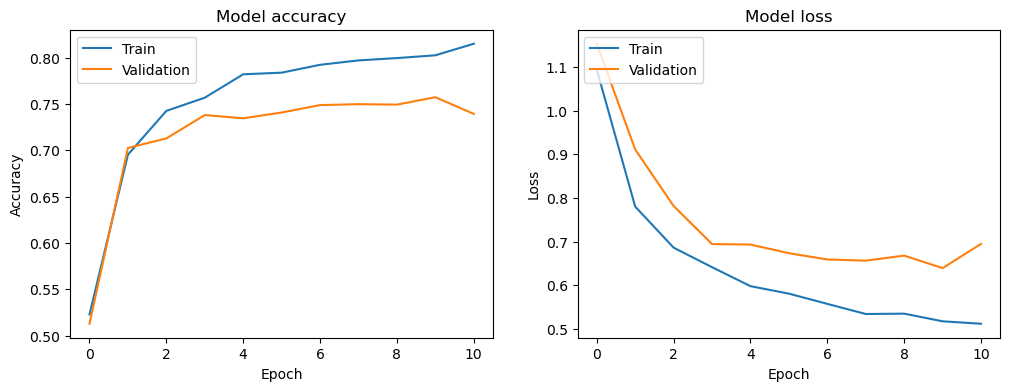

In [7]:
#Model 1
#Vgg16
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout, MaxPooling2D, GlobalAveragePooling2D
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model = Sequential()
pretrained_model= tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model.add(pretrained_model)
model.add(BatchNormalization(synchronized=True))
model.add(MaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Dense(4,activation="softmax"))
#compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy', f1_score]
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model.fit(
    train_data_,
    batch_size=32,
    epochs=11,
    validation_data=val_data,
    callbacks=[early_stopping, lr_callback],
    verbose=1
)
training_accuracy = model.evaluate(train_data)
training_accuracy = model.evaluate(train_data_)
validation_accuracy = model.evaluate(val_data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Accuracy = 80% , F1 score = 1.0743 and the graphs for traning and validation is produced for the data .

Epoch 1/5
125/125 [==============================] - 192s 2s/step - loss: 2.6618 - accuracy: 0.2377 - val_loss: 1.3863 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 2/5
125/125 [==============================] - 208s 2s/step - loss: 1.3864 - accuracy: 0.2447 - val_loss: 1.3863 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/5
125/125 [==============================] - 190s 2s/step - loss: 1.3864 - accuracy: 0.2455 - val_loss: 1.3863 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 4/5
125/125 [==============================] - ETA: 0s - loss: 1.3864 - accuracy: 0.2435
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
125/125 [==============================] - 193s 2s/step - loss: 1.3864 - accuracy: 0.2435 - val_loss: 1.3863 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/5
125/125 [==============================] - 91s 728ms/step - loss: 1.3863 - accuracy: 0.2500


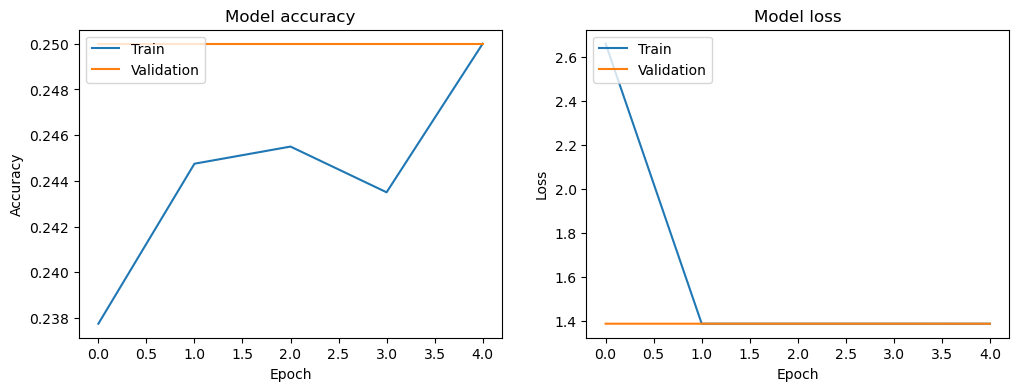

In [15]:
#Model 2
#ResNet50
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_resnet = Sequential()
pretrained_model= tf.keras.applications.resnet50.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model_resnet.add(pretrained_model)
model_resnet.add(Dropout(0.3))
model_resnet.add(Flatten())
model_resnet.add(Dense(128,activation="relu"))
model_resnet.add(Dropout(0.3))
model_resnet.add(Dense(4,activation="softmax"))
#compile model
model_resnet.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model_resnet.fit(
    train_data_,
    batch_size=32,
    epochs=5,
    validation_data=val_data,
    callbacks=[early_stopping, lr_callback],
    verbose=1
)
training_accuracy_resnet = model_resnet.evaluate(train_data)
validation_accuracy_resnet = model_resnet.evaluate(val_data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Accuracy = 25% and the graphs for traning and validation is produced for the data .

Epoch 1/5
125/125 [==============================] - 129s 1s/step - loss: 2.5062 - accuracy: 0.4787 - val_loss: 0.9215 - val_accuracy: 0.5982 - lr: 0.0010
Epoch 2/5
125/125 [==============================] - 127s 1s/step - loss: 1.0113 - accuracy: 0.5565 - val_loss: 0.9033 - val_accuracy: 0.6438 - lr: 0.0010
Epoch 3/5
125/125 [==============================] - 128s 1s/step - loss: 0.9900 - accuracy: 0.5520 - val_loss: 0.8934 - val_accuracy: 0.6342 - lr: 0.0010
Epoch 4/5
125/125 [==============================] - 128s 1s/step - loss: 0.9438 - accuracy: 0.5790 - val_loss: 0.7624 - val_accuracy: 0.6923 - lr: 0.0010
Epoch 5/5
125/125 [==============================] - 62s 495ms/step - loss: 0.8121 - accuracy: 0.6982


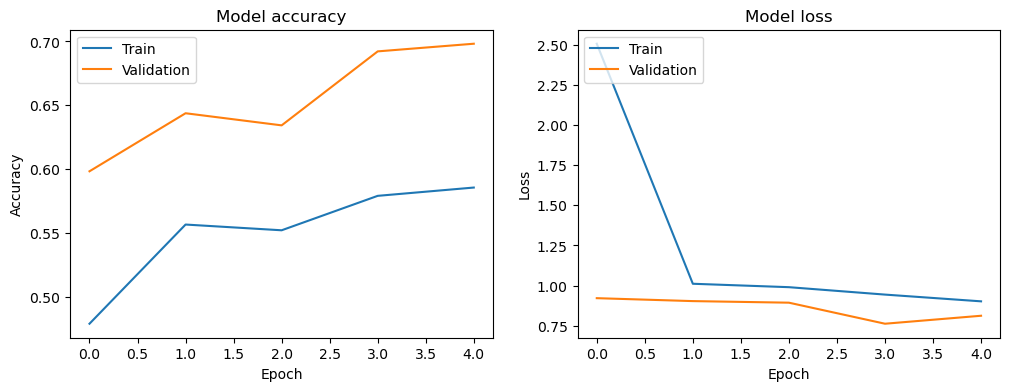

In [20]:
#Inception V3
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

model_v3 = Sequential()
pretrained_model= tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224,3),
    classes=4,)
for layer in pretrained_model.layers:
  layer.trainable=False
model_v3.add(pretrained_model)
model_v3.add(Dropout(0.3))
model_v3.add(Flatten())
model_v3.add(Dense(128,activation="relu"))
model_v3.add(Dropout(0.3))
model_v3.add(Dense(4,activation="softmax"))
#compile model
model_v3.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)
#callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
lr_callback = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)

# Train the model with callbacks
history = model_v3.fit(
    train_data_,
    batch_size=32,
    epochs=5,
    validation_data=val_data,
    callbacks=[early_stopping, lr_callback],
    verbose=1
)
training_accuracy_v3 = model_v3.evaluate(train_data_)
validation_accuracy_v3 = model_v3.evaluate(val_data)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

InceptionV3 was also doing good with about 76% training and 69% validation accuaracy but VGG16 was slightly better as compared we can also try to improve inceptionV3 as the base model and try to increase the accuracy, now in this assignment i am confined to VGG16

# Accuracy and other metrices 

VGG16 was the best model upon those three

In [8]:
import cv2
import random
test_data = []
test_labels = []
predicted_classes = []


test_dir = r"/Users/nikhil/Downloads/ML_Ass2_Dataset/validation"

for cond in ['/NORMAL', '/DME', '/DRUSEN', '/CNV']:
    img_files = os.listdir(test_dir + cond)

    selected_files = random.sample(img_files, 200)

    for img_file in selected_files:

        img_path = os.path.join(test_dir+ cond+ "/" + img_file)

        img = cv2.imread(img_path)

        img = cv2.resize(img, (224, 224))
        img = img.astype('float32') / 255
        img = np.expand_dims(img, axis=0)

        if cond=='/CNV':
            label = 0
        elif cond=='/DME':
            label = 1
        elif cond=='/DRUSEN':
            label = 2
        elif cond=='/NORMAL':
            label = 3

        test_data.append(img)
        test_labels.append(label)
        predicted_classes.append(model.predict(img))

test_data = np.array(test_data)
test_labels = np.array(test_labels)
predicted_classes = np.array(predicted_classes)
test_labels

1/1 [==============================] - 0s 95ms/step


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [9]:
pred_labels = []
for i in range(len(predicted_classes)):
    pred_labels.append(np.argmax(predicted_classes[i][0]))
np.array(pred_labels)

array([3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1,
       3, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 0, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 2, 3, 1, 3, 3, 3, 1,

Here we took the testing data to be the validation set and we got the predicted labels and the original labels as well 

# Importing Metrics 

In [10]:
!pip install -U scikit-learn
import sklearn
from sklearn import metrics

In [11]:
report = sklearn.metrics.classification_report(test_labels, pred_labels, target_names = class_names)
print(report)

              precision    recall  f1-score   support

         CNV       0.74      0.79      0.76       200
         DME       0.90      0.65      0.76       200
      DRUSEN       0.71      0.52      0.60       200
      NORMAL       0.63      0.94      0.75       200

    accuracy                           0.72       800
   macro avg       0.74      0.72      0.72       800
weighted avg       0.74      0.72      0.72       800



The above table gives all the required results like the precission of a class , recall of a class, macro avg and weighted average. 

# Confusion Matrix

In [18]:
confusion_mtx = tf.math.confusion_matrix(test_labels, pred_labels, num_classes=4)
print("Confusion Matrix:")
print(confusion_mtx)

Confusion Matrix:
tf.Tensor(
[[158   7  33   2]
 [ 18 123  10  49]
 [ 35   6 102  57]
 [  2   6   4 188]], shape=(4, 4), dtype=int32)


<Axes: >

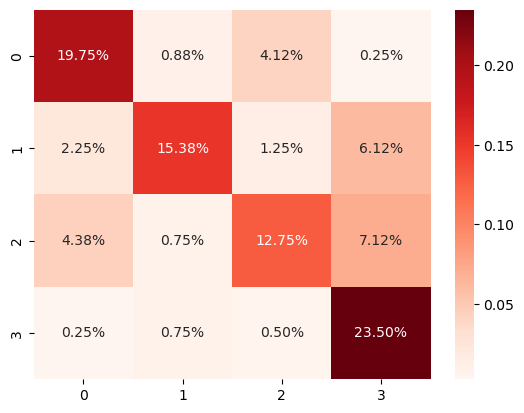

In [19]:
sns.heatmap(confusion_mtx/np.sum(confusion_mtx), annot=True,
            fmt='.2%', cmap='Reds')

# Testing

Testing data is in test_data_dir, now we will predict various classes they belong to.  

In [ ]:
img_files = os.listdir(test_data_dir)
testing_classes = []
testing_pred_labels =[]
for img in img_files :
    img_path = os.path.join(test_data_dir+"/" + img)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    img = img.astype('float32') / 255
    img = np.expand_dims(img, axis=0)

    testing_classes.append(model.predict(img))
    testing_pred_labels.append(np.argmax(testing_classes[-1][0]))
print("results of belonging to various classes :",testing_classes)
print("Mostly probable chance of belonging the class :",testing_pred_labels)

1/1 [==============================] - 0s 92ms/step
results of belonging to various classes : 

In [33]:
print("Size of testing classes :", len(testing_classes))
print("Size of testing predicted labels :", len(testing_pred_labels))

Size of testing classes : 10000
Size of testing predicted labels : 10000


sir testing_pred_labels are my predicted outputs for the testing data you provided . 

In [35]:
testing_pred_labels_ = np.array(testing_pred_labels)

In [36]:
print(testing_pred_labels)

[0, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 1, 3, 1, 0, 3, 2, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 3, 1, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 2, 3, 2, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 0, 0, 3, 0, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 3, 2, 0, 0, 2, 3, 3, 1, 1, 3, 3, 0, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 0, 3, 0, 2, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 2, 3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 1, 0, 3, 3, 0, 1, 0, 1, 0, 3, 0, 0, 0, 1, 3, 0, 3, 3, 2, 1, 3, 3, 0, 3, 0, 0, 3, 3, 3, 2, 0, 0, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 3, 3, 1, 0, 2, 3, 3, 3, 2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 1, 0, 2, 3, 0, 0, 3, 3, 3, 0, 2, 3, 0, 2, 3, 0, 0, 3, 3, 3, 3, 0, 2, 2, 3, 3, 0, 0, 3, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 2, 3, 2, 0, 1, 3, 1, 0, 3, 3, 3, 0, 3, 0, 3, 3, 